In [2]:
import lasio
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 210916_IOA_08_BDC-2-04_TD_695.las to 210916_IOA_08_BDC-2-04_TD_695.las
Saving 210917_IOA_09_BDC-2-04_TD_1171.las to 210917_IOA_09_BDC-2-04_TD_1171.las
Saving 210918_IOA_10_BDC-2-04_TD_1551.las to 210918_IOA_10_BDC-2-04_TD_1551.las
Saving 210919_IOA_11_BDC-2-04_TD_2047.las to 210919_IOA_11_BDC-2-04_TD_2047.las
Saving 210920_IOA_12_BDC-2-04_TD_2261.las to 210920_IOA_12_BDC-2-04_TD_2261.las
Saving 210921_IOA_13_BDC-2-04_TD_2327.las to 210921_IOA_13_BDC-2-04_TD_2327.las
Saving 210922_IOA_14_BDC-2-04_TD_2462.las to 210922_IOA_14_BDC-2-04_TD_2462.las
Saving 210923_IOA_15_BDC-2-04_TD_2516.las to 210923_IOA_15_BDC-2-04_TD_2516.las
Saving 210924_IOA_16_BDC-2-04_TD_2516.las to 210924_IOA_16_BDC-2-04_TD_2516.las
User uploaded file "210916_IOA_08_BDC-2-04_TD_695.las" with length 7176973 bytes
User uploaded file "210917_IOA_09_BDC-2-04_TD_1171.las" with length 7280665 bytes
User uploaded file "210918_IOA_10_BDC-2-04_TD_1551.las" with length 7280665 bytes
User uploaded file "210919_IOA_11_BDC

In [5]:
def read_las_files(file_list):
    dfs=pd.DataFrame()
    path = 'Data/LAS/'
    path = ''
    for file in file_list:
        well = lasio.read(path+file)
        df = well.df()
        dfs=pd.concat([dfs, df], ignore_index=False)
    return dfs

file_list=['210915_IOA_07_BDC-2-04_TD_695.las','210916_IOA_08_BDC-2-04_TD_695.las','210917_IOA_09_BDC-2-04_TD_1171.las','210918_IOA_10_BDC-2-04_TD_1551.las',
          '210919_IOA_11_BDC-2-04_TD_2047.las','210920_IOA_12_BDC-2-04_TD_2261.las','210921_IOA_13_BDC-2-04_TD_2327.las','210922_IOA_14_BDC-2-04_TD_2462.las',
          '210923_IOA_15_BDC-2-04_TD_2516.las','210924_IOA_16_BDC-2-04_TD_2516.las']
df=read_las_files(file_list)

df.head()

,HDEP,HDTVD,LAGDEPTH,BPOS,TFHA,TFBA,FTAA,FRSA,RPMTOTAL,SPP1,...,2C3,2C4I,2C4N,2C5O,2C5I,TFCP,DI01,DI02,DI03,DI04
TIME,,,,,,,,,,,,,,,,,,,,,
00:00:00.15-09-21,512.62,512.61,512.62,5.52,179.6,13.8,4.2,98.0,98.0,1741.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
00:00:05.15-09-21,512.65,512.65,512.65,5.50,179.7,13.5,3.1,98.0,98.0,1738.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
00:00:10.15-09-21,512.65,512.65,512.65,5.56,176.7,16.6,4.1,98.0,98.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
00:00:15.15-09-21,512.65,512.65,512.65,5.52,180.4,13.1,3.9,98.0,98.0,1728.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
00:00:20.15-09-21,512.65,512.65,512.65,5.50,179.5,13.8,3.1,98.0,98.0,1743.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
len(df)

172810

In [7]:
df2 = df.loc[:, ['TFBA', 'RPMTOTAL','FTAA','FRPI','HDEP']]
df2 = df2.dropna()
df2 = df2.loc[(df2 != 0).all(axis=1)]
len(df2)

64957

In [8]:
BS = 17.5
Bit_Area=(BS**2)*math.pi/4
factor = 0.35

def calculate_MSE(row):
    return (factor / Bit_Area) * (row['TFBA'] + ( 120 * math.pi * row['RPMTOTAL'] * row['FTAA']) / (row['FRPI'] * 3.28084))

# Apply the function to each row of the dataframe
df2['MSE'] = df2.apply(calculate_MSE, axis=1)

df2 = df2.dropna()
print(df2)


                   TFBA  RPMTOTAL  FTAA  FRPI     HDEP         MSE
TIME                                                              
00:00:00.15-09-21  13.8      98.0   4.2  6.25   512.62   11.031505
00:00:05.15-09-21  13.5      98.0   3.1  6.37   512.65    7.994016
00:00:10.15-09-21  16.6      98.0   4.1  6.37   512.65   10.570905
00:00:15.15-09-21  13.1      98.0   3.9  5.37   512.65   11.919544
00:00:30.15-09-21  11.8      98.0   3.3  9.53   512.72    5.691248
...                 ...       ...   ...   ...      ...         ...
14:16:40.23-09-21  28.6     220.0  11.2  0.57  2515.78  722.834688
14:17:10.23-09-21  27.8     220.0  10.6  0.57  2515.81  684.112467
14:17:15.23-09-21  28.8     220.0  10.0  4.04  2515.81   91.093899
14:17:20.23-09-21  30.6     220.0  11.2  4.18  2515.81   98.607219
14:17:25.23-09-21  25.4     217.0  10.5  0.92  2515.81  414.140878

[64957 rows x 6 columns]


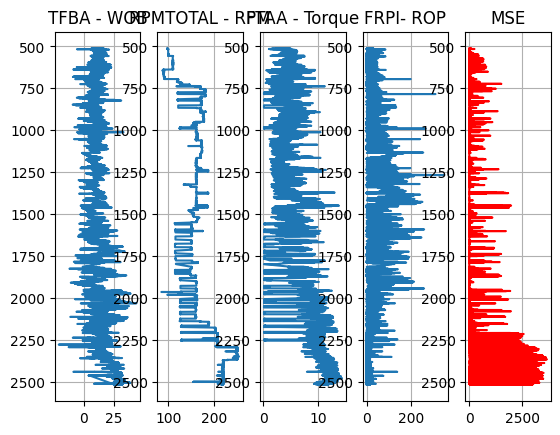

In [9]:
df2=df2.reset_index()

ax1=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax1.plot("TFBA","HDEP",data=df2)
ax1.invert_yaxis()
ax1.set_title('TFBA - WOB')
ax1.grid()

ax2=plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax2.plot("RPMTOTAL","HDEP",data=df2)
ax2.invert_yaxis()
ax2.set_title('RPMTOTAL - RPM')
ax2.grid()

ax3=plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax3.plot("FTAA","HDEP",data=df2)
ax3.invert_yaxis()
ax3.set_title('FTAA - Torque')
ax3.grid()

ax4=plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax4.plot("FRPI","HDEP",data=df2)
ax4.invert_yaxis()
ax4.set_title('FRPI- ROP')
ax4.grid()

ax5=plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)
ax5.plot("MSE","HDEP",data=df2, color='red')
ax5.invert_yaxis()
ax5.set_title('MSE')
ax5.grid()


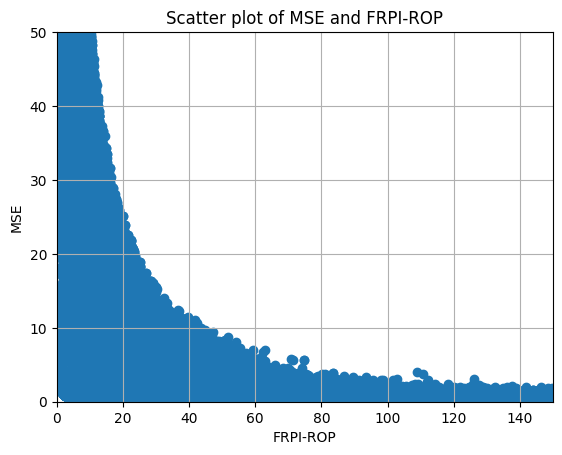

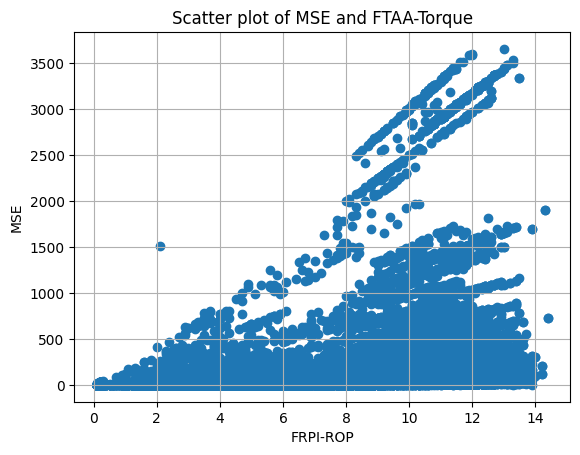

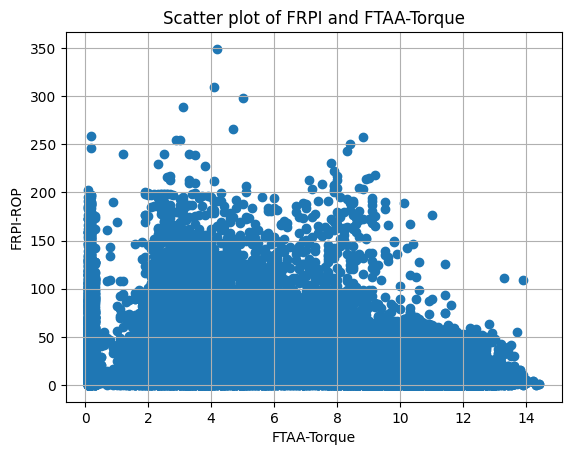

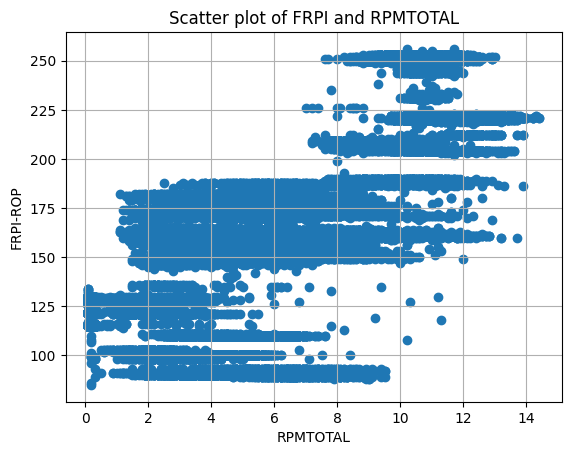

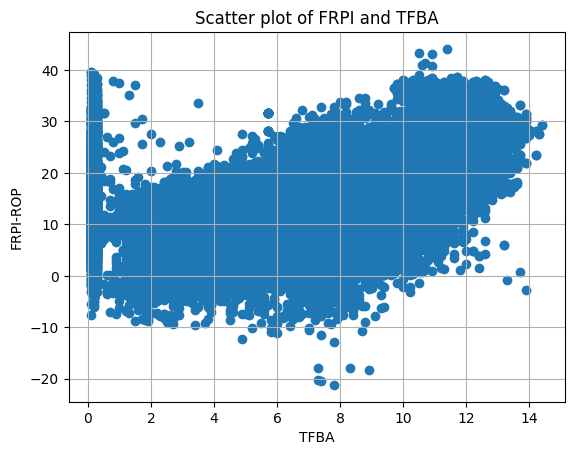

In [10]:
plt.figure()
ax5 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax5.set_ylim([0, 50])
ax5.set_xlim([0, 150])
ax5.scatter(df2['FRPI'], df2['MSE'])
ax5.set_title('Scatter plot of MSE and FRPI-ROP')
ax5.set_xlabel('FRPI-ROP')
ax5.set_ylabel('MSE')
ax5.grid()

plt.figure()
ax5 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax5.scatter(df2['FTAA'], df2['MSE'])
ax5.set_title('Scatter plot of MSE and FTAA-Torque')
ax5.set_xlabel('FRPI-ROP')
ax5.set_ylabel('MSE')
ax5.grid()

plt.figure()
ax5 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax5.scatter(df2['FTAA'], df2['FRPI'])
ax5.set_title('Scatter plot of FRPI and FTAA-Torque')
ax5.set_xlabel('FTAA-Torque')
ax5.set_ylabel('FRPI-ROP')
ax5.grid()

plt.figure()
ax5 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax5.scatter(df2['FTAA'], df2['RPMTOTAL'])
ax5.set_title('Scatter plot of FRPI and RPMTOTAL')
ax5.set_xlabel('RPMTOTAL')
ax5.set_ylabel('FRPI-ROP')
ax5.grid()

plt.figure()
ax5 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax5.scatter(df2['FTAA'], df2['TFBA'])
ax5.set_title('Scatter plot of FRPI and TFBA')
ax5.set_xlabel('TFBA')
ax5.set_ylabel('FRPI-ROP')
ax5.grid()


Coefficient of determination: 1.0
Predicted response:
[2. 3. 4. 5. 6.]


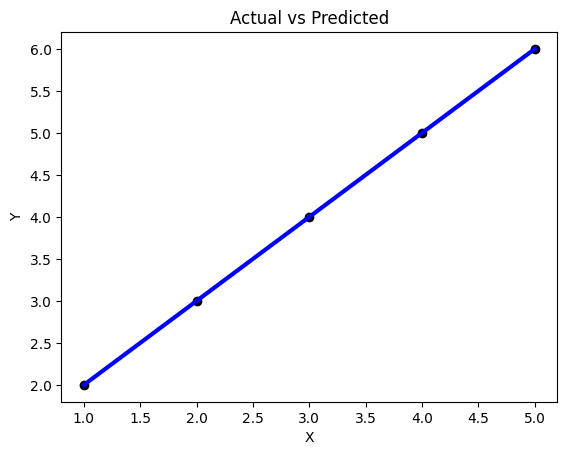

In [11]:
from sklearn.linear_model import LinearRegression

# Creating the dataset
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 3, 4, 5, 6]})

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(data[['x']], data['y'])

# Getting the R-squared value
r_sq = model.score(data[['x']], data['y'])
print('Coefficient of determination:', r_sq)

# Predicting the response
y_pred = model.predict(data[['x']])
print('Predicted response:', y_pred, sep='\n')

# Plotting the actual versus predicted results
x = data['x']
y = data['y']
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Coefficient of determination: 0.9725810689583088
Predicted response:
[1.84051578 2.27633027 2.71214476 3.58377373 4.01958822 4.45540271
 5.23986879 5.76284617 5.93717197 6.46014935 7.07028964 7.94191861]


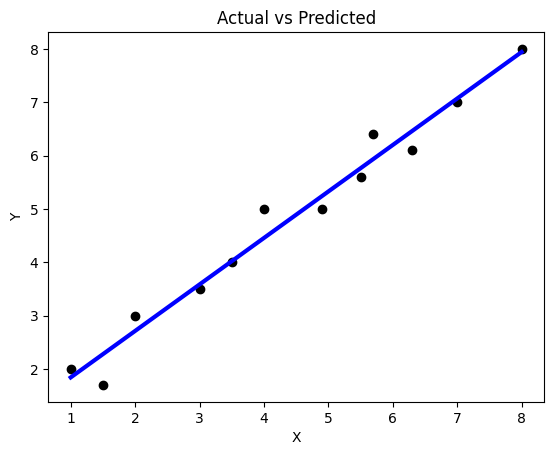

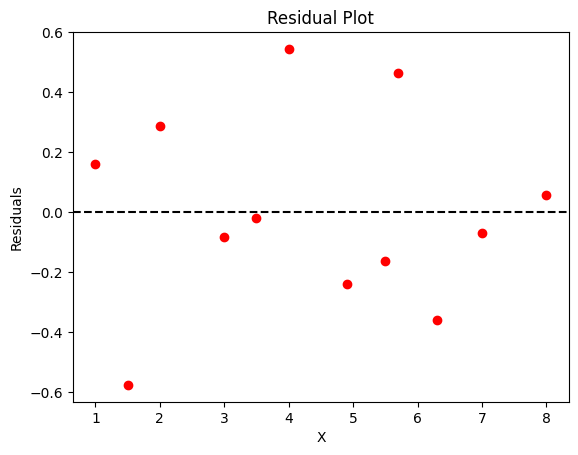

In [12]:
# Creating the dataset
data = pd.DataFrame({'x': [1, 1.5, 2, 3, 3.5, 4, 4.9, 5.5, 5.7, 6.3, 7, 8], 'y': [2, 1.7, 3, 3.5, 4, 5, 5, 5.6, 6.4, 6.1, 7, 8]})

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(data[['x']], data['y'])

# Getting the R-squared value
r_sq = model.score(data[['x']], data['y'])
print('Coefficient of determination:', r_sq)

# Predicting the response
y_pred = model.predict(data[['x']])
print('Predicted response:', y_pred, sep='\n')

# Plotting the actual versus predicted results
x = data['x']
y = data['y']
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')

# Plotting the residuals
residuals = y - y_pred
plt.figure()
plt.scatter(x, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

Coefficient of determination: 0.08976029815088826
Predicted response:
[30.5407438  30.5407438  30.5407438  ... 10.82524291 10.82524291
 11.31005031]


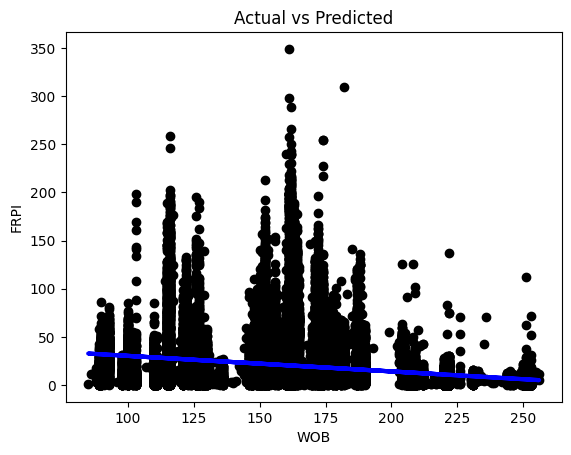

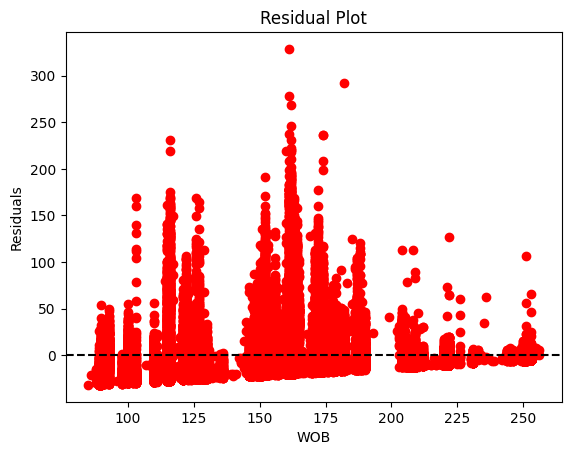

In [13]:
# Creating the dataset
data = df2

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(data[['RPMTOTAL']], data['FRPI'])

# Getting the R-squared value
r_sq = model.score(data[['RPMTOTAL']], data['FRPI'])
print('Coefficient of determination:', r_sq)

# Predicting the response
y_pred = model.predict(data[['RPMTOTAL']])
print('Predicted response:', y_pred, sep='\n')

# Plotting the actual versus predicted results
x = data['RPMTOTAL']
y = data['FRPI']
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('Actual vs Predicted')
plt.xlabel('WOB')
plt.ylabel('FRPI')

# Plotting the residuals
residuals = y - y_pred
plt.figure()
plt.scatter(x, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('WOB')
plt.ylabel('Residuals')
plt.show()


Coefficient of determination: 0.07401155681736404
Predicted response:
[ 40.37452497  18.40364221  38.37717199 ... 156.22099772 180.18923346
 166.20776261]


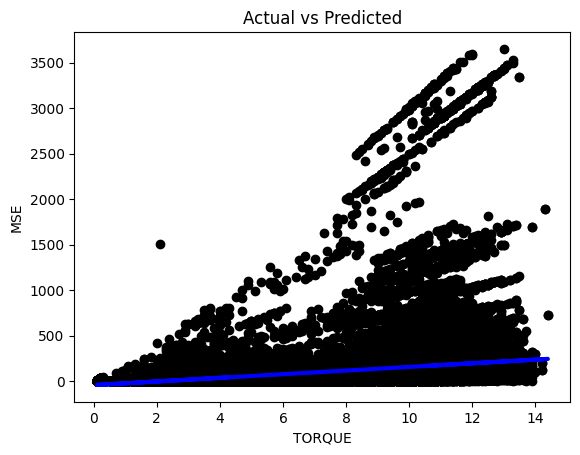

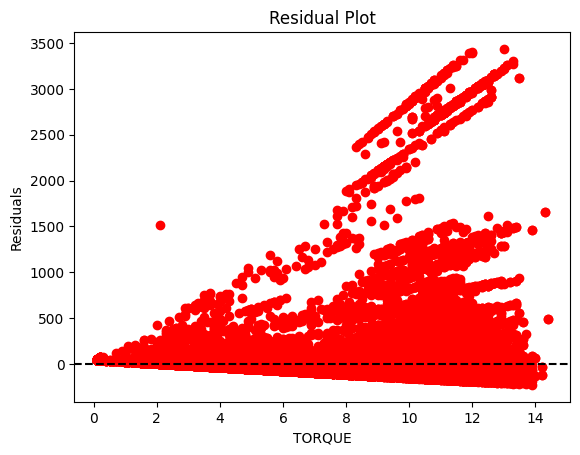

In [14]:
# Creating the dataset
data = df2

# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(data[['FTAA']], data['MSE'])

# Getting the R-squared value
r_sq = model.score(data[['FTAA']], data['MSE'])
print('Coefficient of determination:', r_sq)

# Predicting the response
y_pred = model.predict(data[['FTAA']])
print('Predicted response:', y_pred, sep='\n')

# Plotting the actual versus predicted results
x = data['FTAA']
y = data['MSE']
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('Actual vs Predicted')
plt.xlabel('TORQUE')
plt.ylabel('MSE')

# Plotting the residuals
residuals = y - y_pred
plt.figure()
plt.scatter(x, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('TORQUE')
plt.ylabel('Residuals')
plt.show()


In [15]:
def linear_regression(data: pd.DataFrame, torque_col: str, mse_col: str) -> None:
    # Creating the model
    model = LinearRegression()

    # Fitting the model
    model.fit(data[[torque_col]], data[mse_col])

    # Getting the R-squared value
    r_sq = model.score(data[[torque_col]], data[mse_col])
    print('Coefficient of determination:', r_sq)

    # Predicting the response
    y_pred = model.predict(data[[torque_col]])
    print('Predicted response:', y_pred, sep='\n')

    # Plotting the actual versus predicted results
    x = data[torque_col]
    y = data[mse_col]
    plt.scatter(x, y, color='black')
    plt.plot(x, y_pred, color='blue', linewidth=3)
    plt.title('Actual vs Predicted')
    plt.xlabel(torque_col)
    plt.ylabel(mse_col)

    # Plotting the residuals
    residuals = y - y_pred
    plt.figure()
    plt.scatter(x, residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel(torque_col)
    plt.ylabel('Residuals')
    plt.show()

Coefficient of determination: 0.07401155681736404
Predicted response:
[ 40.37452497  18.40364221  38.37717199 ... 156.22099772 180.18923346
 166.20776261]


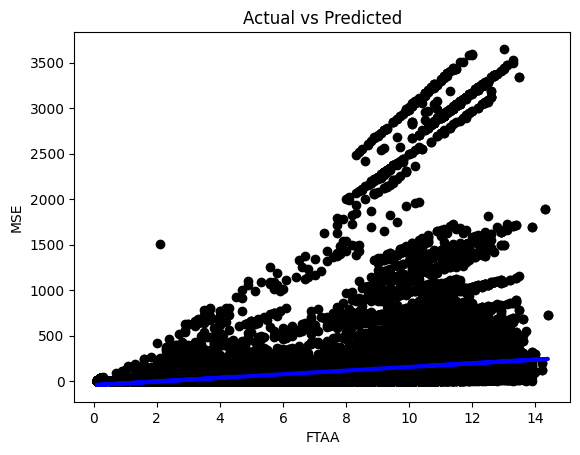

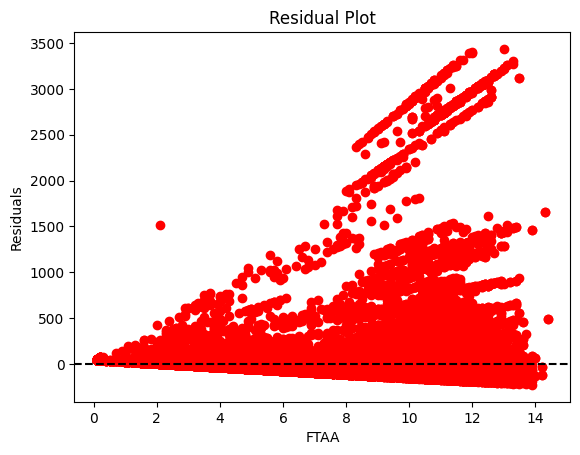

In [18]:
linear_regression(df2, 'FTAA', 'MSE')

Coefficient of determination: 0.10669410889431752
Predicted response:
[19.11464752 19.40380157 16.41587636 ...  4.65694488  2.92202056
  7.93402414]


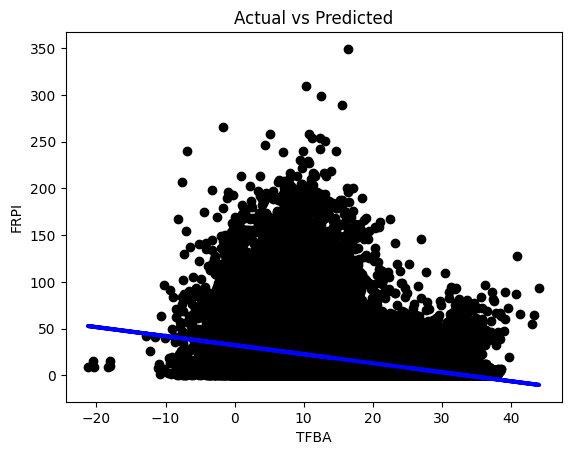

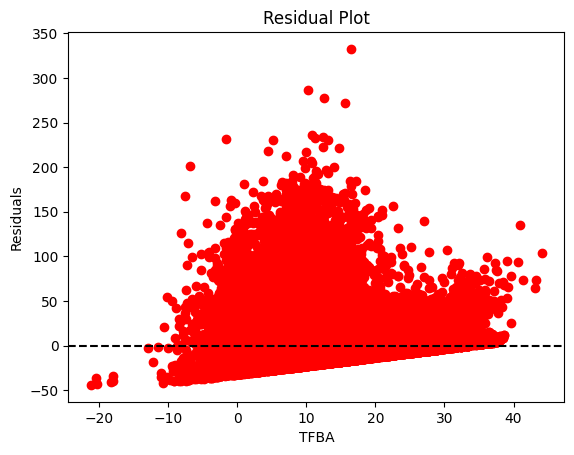

In [19]:
linear_regression(df2, 'TFBA', 'FRPI')

In [20]:
print(df2.columns)


Index(['TIME', 'TFBA', 'RPMTOTAL', 'FTAA', 'FRPI', 'HDEP', 'MSE'], dtype='object')


Linear Regression MSE: 447.80, R2: 0.29


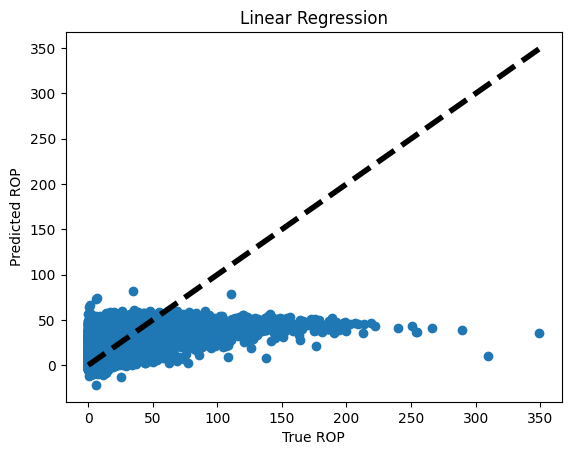

SVM MSE: 552.92, R2: 0.13


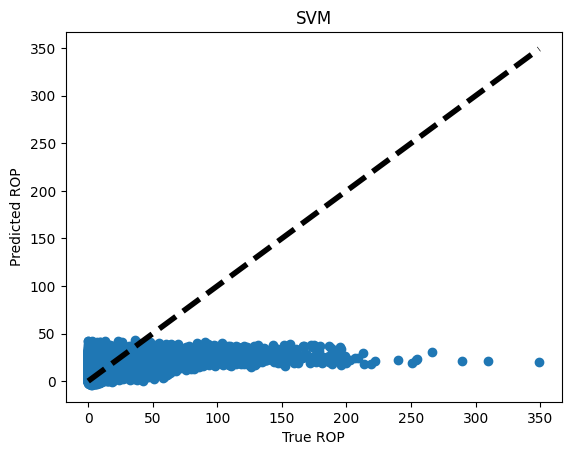

/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=4.39088e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge Regression (alpha=10.0) MSE: 447.80, R2: 0.29


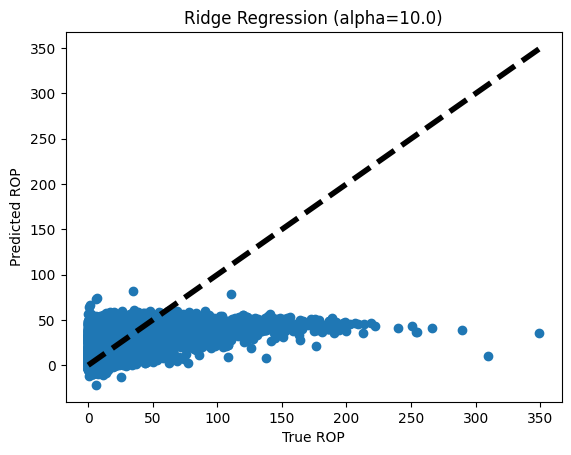

Ridge Regression (alpha=100.0) MSE: 447.79, R2: 0.29


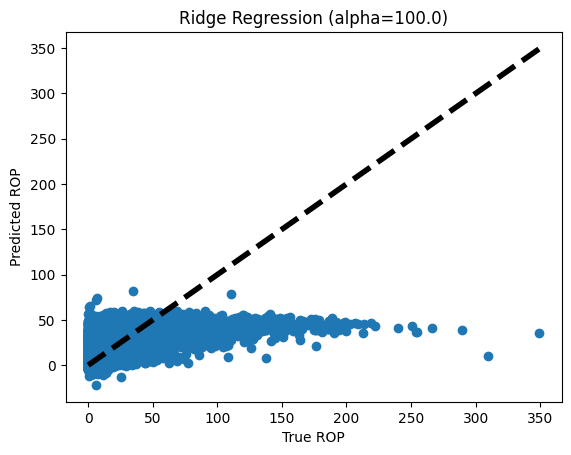

Decision Tree MSE: 292.07, R2: 0.54


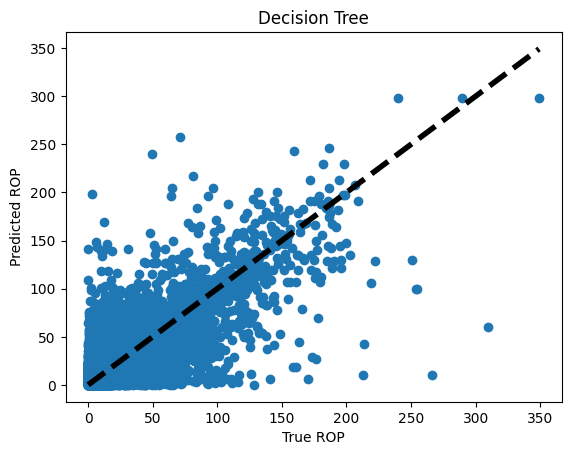

Random Forest MSE: 168.66, R2: 0.73


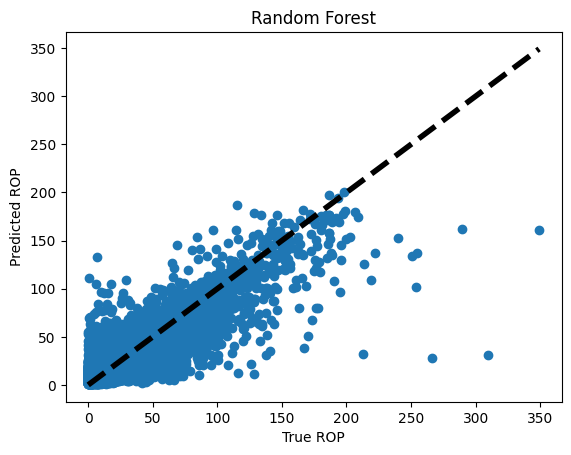

In [21]:
df3=df2[:-3000]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
X = df3[['TFBA', 'RPMTOTAL', 'FTAA', 'HDEP']]
y = df3['FRPI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the models
models = [LinearRegression(), Ridge(alpha=1.0), Ridge(alpha=10.0), Ridge(alpha=100.0), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_names = ['Linear Regression', 'SVM','Ridge Regression (alpha=10.0)', 'Ridge Regression (alpha=100.0)', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    if name == 'SVM':
        model.fit(X_train, y_train)
    else:
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    if name == 'SVM':
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f}, R2: {r2:.2f}')

    # Plot true ROP vs predicted
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('True ROP')

    plt.ylabel('Predicted ROP')
    plt.title(name)
    plt.show()

In [22]:
# Split the data into training and testing sets
X = df3[['TFBA', 'RPMTOTAL', 'FTAA', 'HDEP']]
y = df3['FRPI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the models
models = [LinearRegression(), Ridge(alpha=1.0), Ridge(alpha=10.0), Ridge(alpha=100.0), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_names = ['Linear Regression', 'SVM','Ridge Regression (alpha=10.0)', 'Ridge Regression (alpha=100.0)', 'Decision Tree', 'Random Forest']

# Select the model with the lowest R2
min_r2 = float('inf')
best_model = None
for model, name in zip(models, model_names):
    if name == 'SVM':
        model.fit(X_train, y_train)
    else:
        poly = PolynomialFeatures(degree=2)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    if name == 'SVM':
        y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} MSE: {mse:.2f}, R2: {r2:.2f}')
    if r2 < min_r2:
        min_r2 = r2
        best_model = model

Linear Regression MSE: 447.80, R2: 0.29
SVM MSE: 552.92, R2: 0.13
Ridge Regression (alpha=10.0) MSE: 447.80, R2: 0.29
Ridge Regression (alpha=100.0) MSE: 447.79, R2: 0.29


/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=4.39088e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Decision Tree MSE: 293.62, R2: 0.54
Random Forest MSE: 170.05, R2: 0.73


/tmp/ipython-input-846204439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ROP_pred'] = y_pred


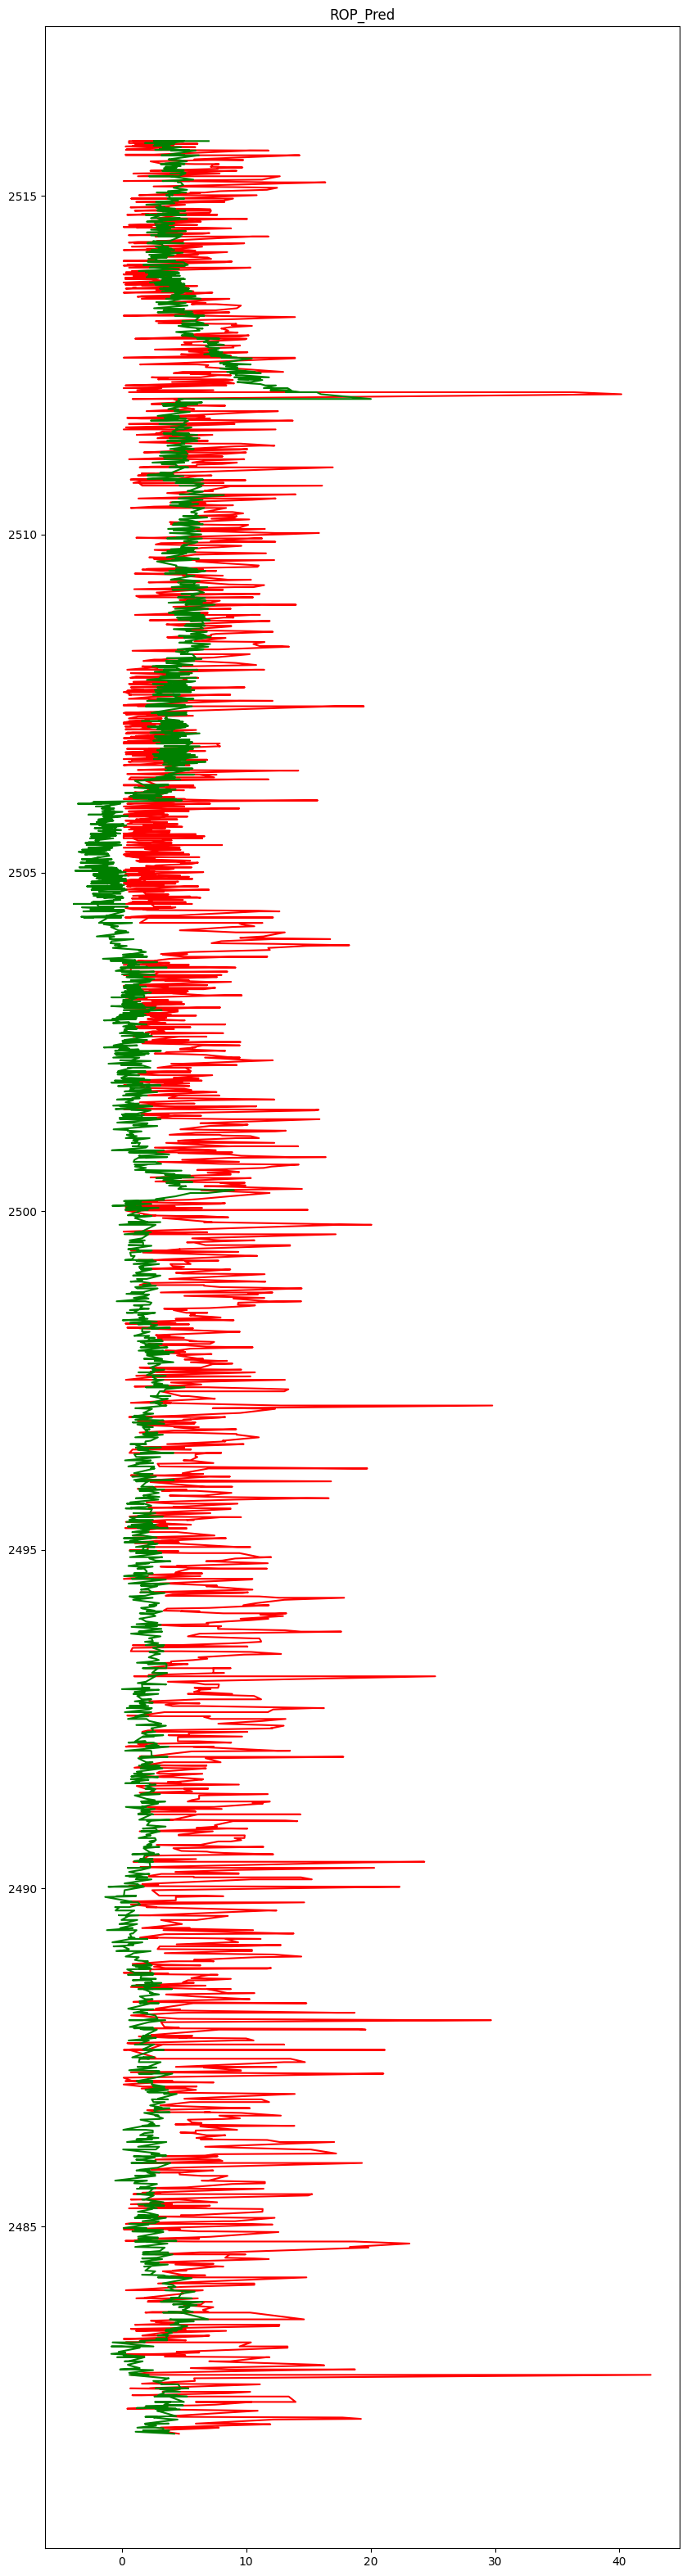

In [23]:
df4=df2[-3000:]

# Predict ROP using values from a dataframe df4
X_new = df4[['TFBA', 'RPMTOTAL', 'FTAA', 'HDEP']]
y_pred = best_model.predict(X_new)

# Add the predicted values to df4 as a new column called ROP_pred
df4['ROP_pred'] = y_pred

fig, ax = plt.subplots(1, 1, figsize=(10, 40))

ax.plot("FRPI","HDEP",data=df4, color='red')
ax.invert_yaxis()
ax.set_title('ROP')

ax.plot("ROP_pred","HDEP",data=df4, color='green')
ax.invert_yaxis()
ax.set_title('ROP_Pred')

plt.show()

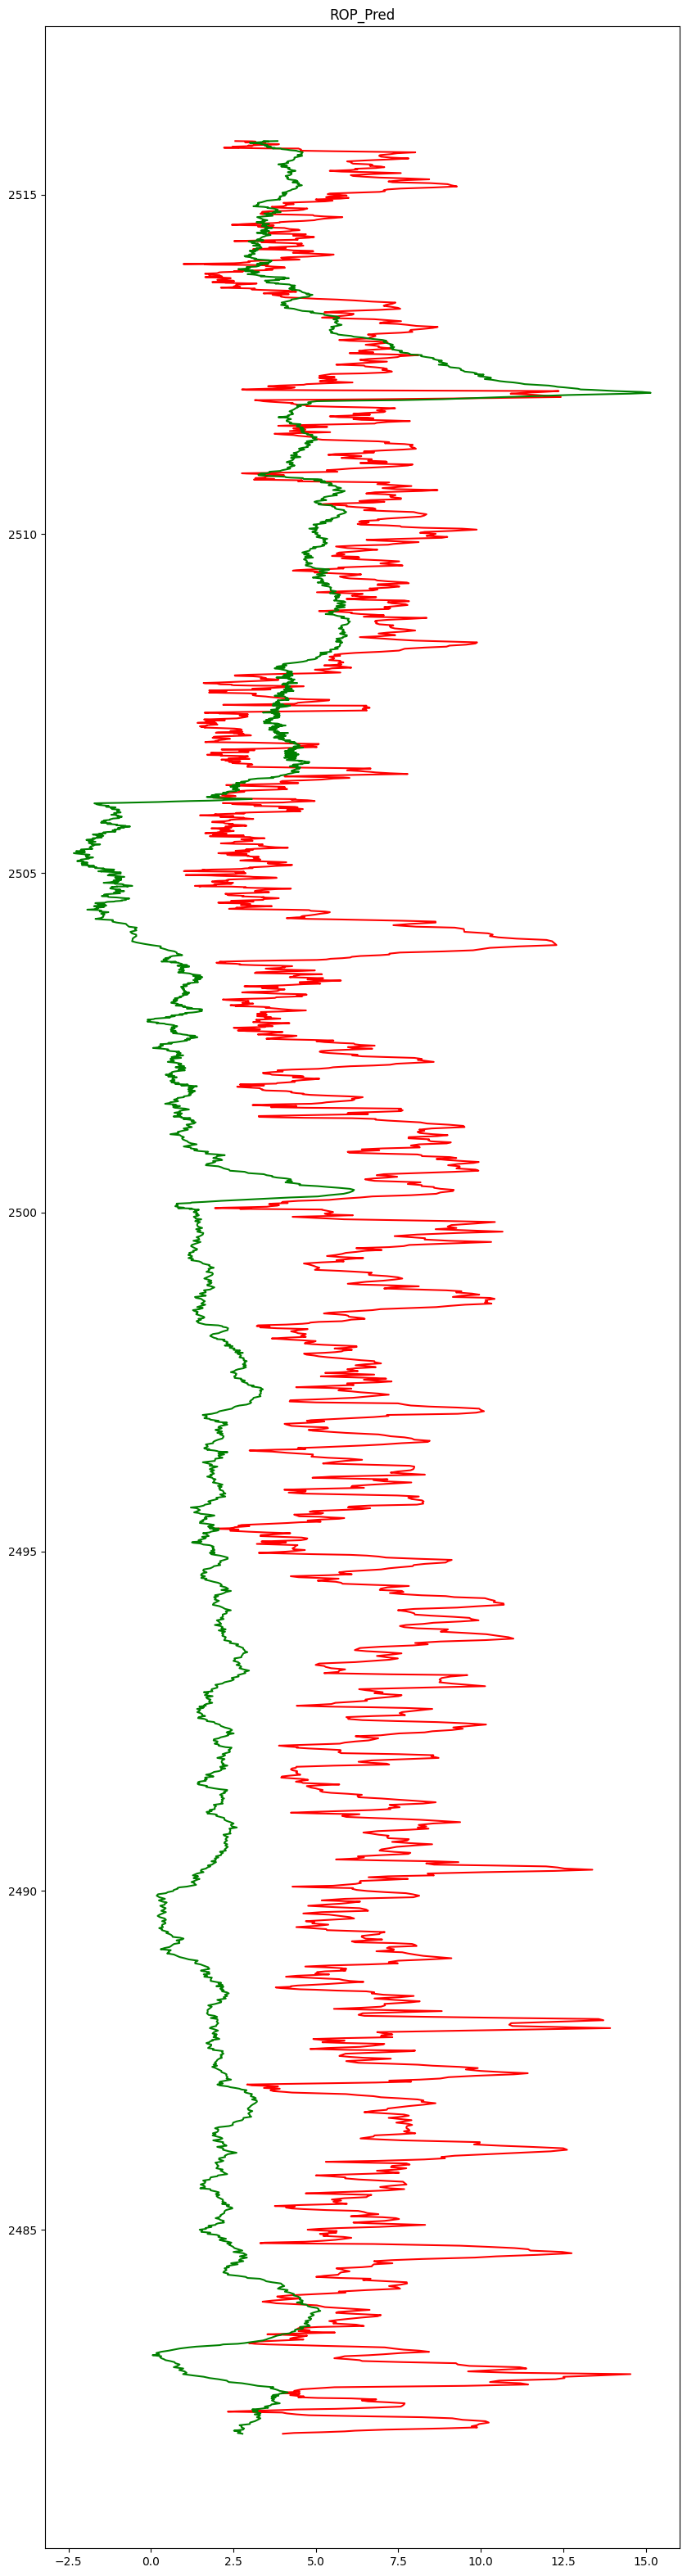

In [27]:
df4.head()

# define the window size
WS = 10

dfs=pd.DataFrame()
for column in df4.columns:
    dfs[column] = df4[column].rolling(window=WS).mean()

fig, ax = plt.subplots(1, 1, figsize=(10, 40))

ax.plot("FRPI","HDEP",data=dfs, color='red')
ax.invert_yaxis()
ax.set_title('ROP')

ax.plot("ROP_pred","HDEP",data=dfs, color='green')
ax.invert_yaxis()
ax.set_title('ROP_Pred')

plt.show()